<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Session 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**

**Import the required libraries**

In [118]:
# type your code here
import pandas as pd
import numpy as np

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [197]:
# load the csv file
data=pd.read_csv("Life_Expectancy.csv")
# type your code here
data.head(2)

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5


### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

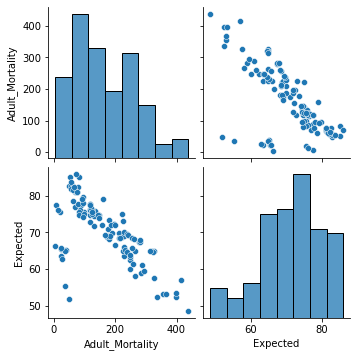

In [120]:
import seaborn as sns
from sklearn.model_selection import train_test_split
# type your code here
sns.pairplot(data[["Adult_Mortality","Expected"]])

In [121]:
x_train,x_test,y_train,y_test=train_test_split(data['Adult_Mortality'],data['Expected'],random_state=1,test_size=0.3)

In [122]:
x_train=pd.DataFrame(x_train)
c=np.ones(x_train.shape[0])
x_train.insert(loc=0,column='intercept',value=c)
x_train.head(2)

,intercept,Adult_Mortality
10,1.0,129
112,1.0,239


In [123]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

In [124]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [125]:
for idx,col_names in enumerate(x_train.columns):
    print("The co eff for {} is {}".format(col_names,linreg.coef_[idx]))

The co eff for intercept is 0.0
The co eff for Adult_Mortality is -0.06765779646169716


In [126]:
linreg.score(x_train,y_train)

0.626770622733282

In [127]:
y_pred=linreg.predict(x_train)

Measure the residuals

In [128]:
SSR= np.sum(np.power(y_pred-y_train.mean(),2))
SSR

3924.382939333111

Sum of squared error

In [129]:
SSE=np.sum(np.power(y_pred-y_train,2))
SSE

2336.89159555061

Sum of squared totals

In [130]:
SST=np.sum(np.power(y_train-y_train.mean(),2))
SST

6261.27453488372

In [131]:
r_squared=SSR/SST
print(r_squared)

0.6267706227332822


In [132]:
x_test=pd.DataFrame(x_test)
c=np.ones(x_test.shape[0])
x_test.insert(loc=0,column='intercept',value=c)
x_test.head(2)

,intercept,Adult_Mortality
48,1.0,284
114,1.0,26


In [133]:
SLRmodel=sm.OLS(y_train,x_train).fit()

In [134]:
SLRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sat, 22 May 2021   Prob (F-statistic):           1.15e-19
Time:                        22:30:16   Log-Likelihood:                -264.02
No. Observations:                  86   AIC:                             532.0
Df Residuals:                      84   BIC:                             537.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          82.6276      1.114     74.156      0.000      80.412      84.843
Adult_Mortality    -0.0677      0.006    -11.877      0.000      -0.079      -0.056
==============================================================================
Omnibus:                       55.463   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.534
Skew:                          -2.115   Prob(JB):                     9.55e-48
Kurtosis:                       9.521   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To calculate SSE

In [135]:
see=np.sqrt(SSE/(len(x_train)))
see

5.212787938118891

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [136]:
data.head(2)

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5


<AxesSubplot:xlabel='Income_Index', ylabel='Expected'>

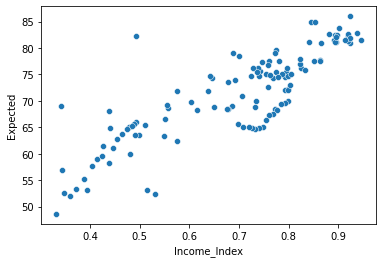

In [137]:
sns.scatterplot(x=data['Income_Index'],y=data['Expected'])

In [138]:
x_data=pd.DataFrame(data['Income_Index'])

In [139]:
x_data.insert(value=np.ones(len(x_data)),column="intercept",loc=0)
x_data.head(2)

,intercept,Income_Index
0,1.0,0.479
1,1.0,0.761


In [140]:
SLR_model=sm.OLS(data['Expected'],x_data).fit()
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Sat, 22 May 2021   Prob (F-statistic):           1.13e-34
Time:                        22:30:17   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       41.9191      1.741     24.081   

In [141]:
y_pred=SLR_model.predict(x_data)

Cal SSR

In [142]:
ssr= np.sum(np.power(y_pred-data['Expected'].mean(),2))
ssr

6270.220680416872

Cal SSE

In [143]:
sse=np.sum(np.power(y_pred-data['Expected'],2))
sse

2549.584803454098

Cal sst

In [144]:
sst=np.sum(np.power(data['Expected']-data['Expected'].mean(),2))
sst

8819.80548387097

In [145]:
sse+ssr

8819.80548387097

In [146]:
r_squared=ssr/sst
r_squared

0.7109250529258727

now calculated adj_r2

In [147]:
x_data.shape

(124, 2)

In [148]:
## degrees of freedom population dep. variable variance
dft = x_data.shape[0] - 1   
dft

123

In [149]:
 ## degrees of freedom population error variance
dfe = x_data.shape[0] - x_data.shape[1] - 1
dfe

121

In [150]:
adj_r2=1-(sse/dfe)/(sst/dft)

<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [151]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [216]:
  # type your code here
data=pd.read_csv("Life_Expectancy.csv")
    
data.head(2)  

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5


In [217]:
data.Status.value_counts()

Developing    105
Developed      19
Name: Status, dtype: int64

In [218]:
data['Status'] = data['Status'].replace({1: 'Developing', 2: 'Developed'})

In [219]:
data=pd.get_dummies(data,columns=['Status'])

In [220]:
y=data['Expected']

In [221]:
x_columns=[]
for item in data.columns:
    if item!='Expected':
        x_columns.append(item)

In [222]:
x=data[x_columns]
x.head()

,Country,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Status_Developed,Status_Developing
0,Afghanistan,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,0,1
1,Albania,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,0,1
2,Algeria,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,0,1
3,Angola,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,0,1
4,Argentina,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,0,1


In [223]:
x.drop(columns='Country',inplace=True)

C:\Users\skv\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [224]:
x.head(1)

,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Status_Developed,Status_Developing
0,263,62,65,1154,19.1,83,6,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1,0,1


In [225]:
x.insert(value=np.ones(len(x)),column="intercept",loc=0)

In [226]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

In [227]:
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

C:\Users\skv\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\skv\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [228]:
print(vif_data)

               feature         VIF
0            intercept    0.000000
1      Adult_Mortality    1.677518
2        Infant_Deaths  119.203369
3           Hepatitis     4.343996
4             Measles     4.844177
5                 BMI     2.246962
6    Underfive_Deaths   107.765413
7                Polio    2.215011
8          Diphtheria     5.696512
9                  HIV    2.194048
10                 GDP    1.409077
11          Population    1.223115
12  Malnourished10_19    14.817945
13     Malnourished5_9   14.007069
14        Income_Index   11.110981
15           Schooling    9.976878
16    Status_Developed         inf
17   Status_Developing         inf


In [209]:
SLR_model=sm.OLS(y,x).fit()
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Sat, 22 May 2021   Prob (F-statistic):           1.94e-36
Time:                        23:23:19   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Adult_Mortality       -0.0231      0

Now remove the Status_developed and Status_Developing

In [229]:
x=data[list(filter(lambda item: "Status" not in str(item),x_columns))]

In [230]:
x.drop(columns='Country',inplace=True)
x.head(2)

C:\Users\skv\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling
0,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2


In [231]:
x.insert(value=np.ones(len(x)),column="intercept",loc=0)

In [232]:
x.head()

,intercept,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling
0,1.0,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,1.0,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2
2,1.0,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4
3,1.0,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4
4,1.0,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3


In [233]:
SLR_model=sm.OLS(y,x).fit()
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     38.99
Date:                Sat, 22 May 2021   Prob (F-statistic):           1.32e-36
Time:                        23:31:30   Log-Likelihood:                -325.11
No. Observations:                 124   AIC:                             682.2
Df Residuals:                     108   BIC:                             727.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             56.6186      3

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here